In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [5]:
df = pd.read_csv('./Data/wine_fraud.csv')

<AxesSubplot:>

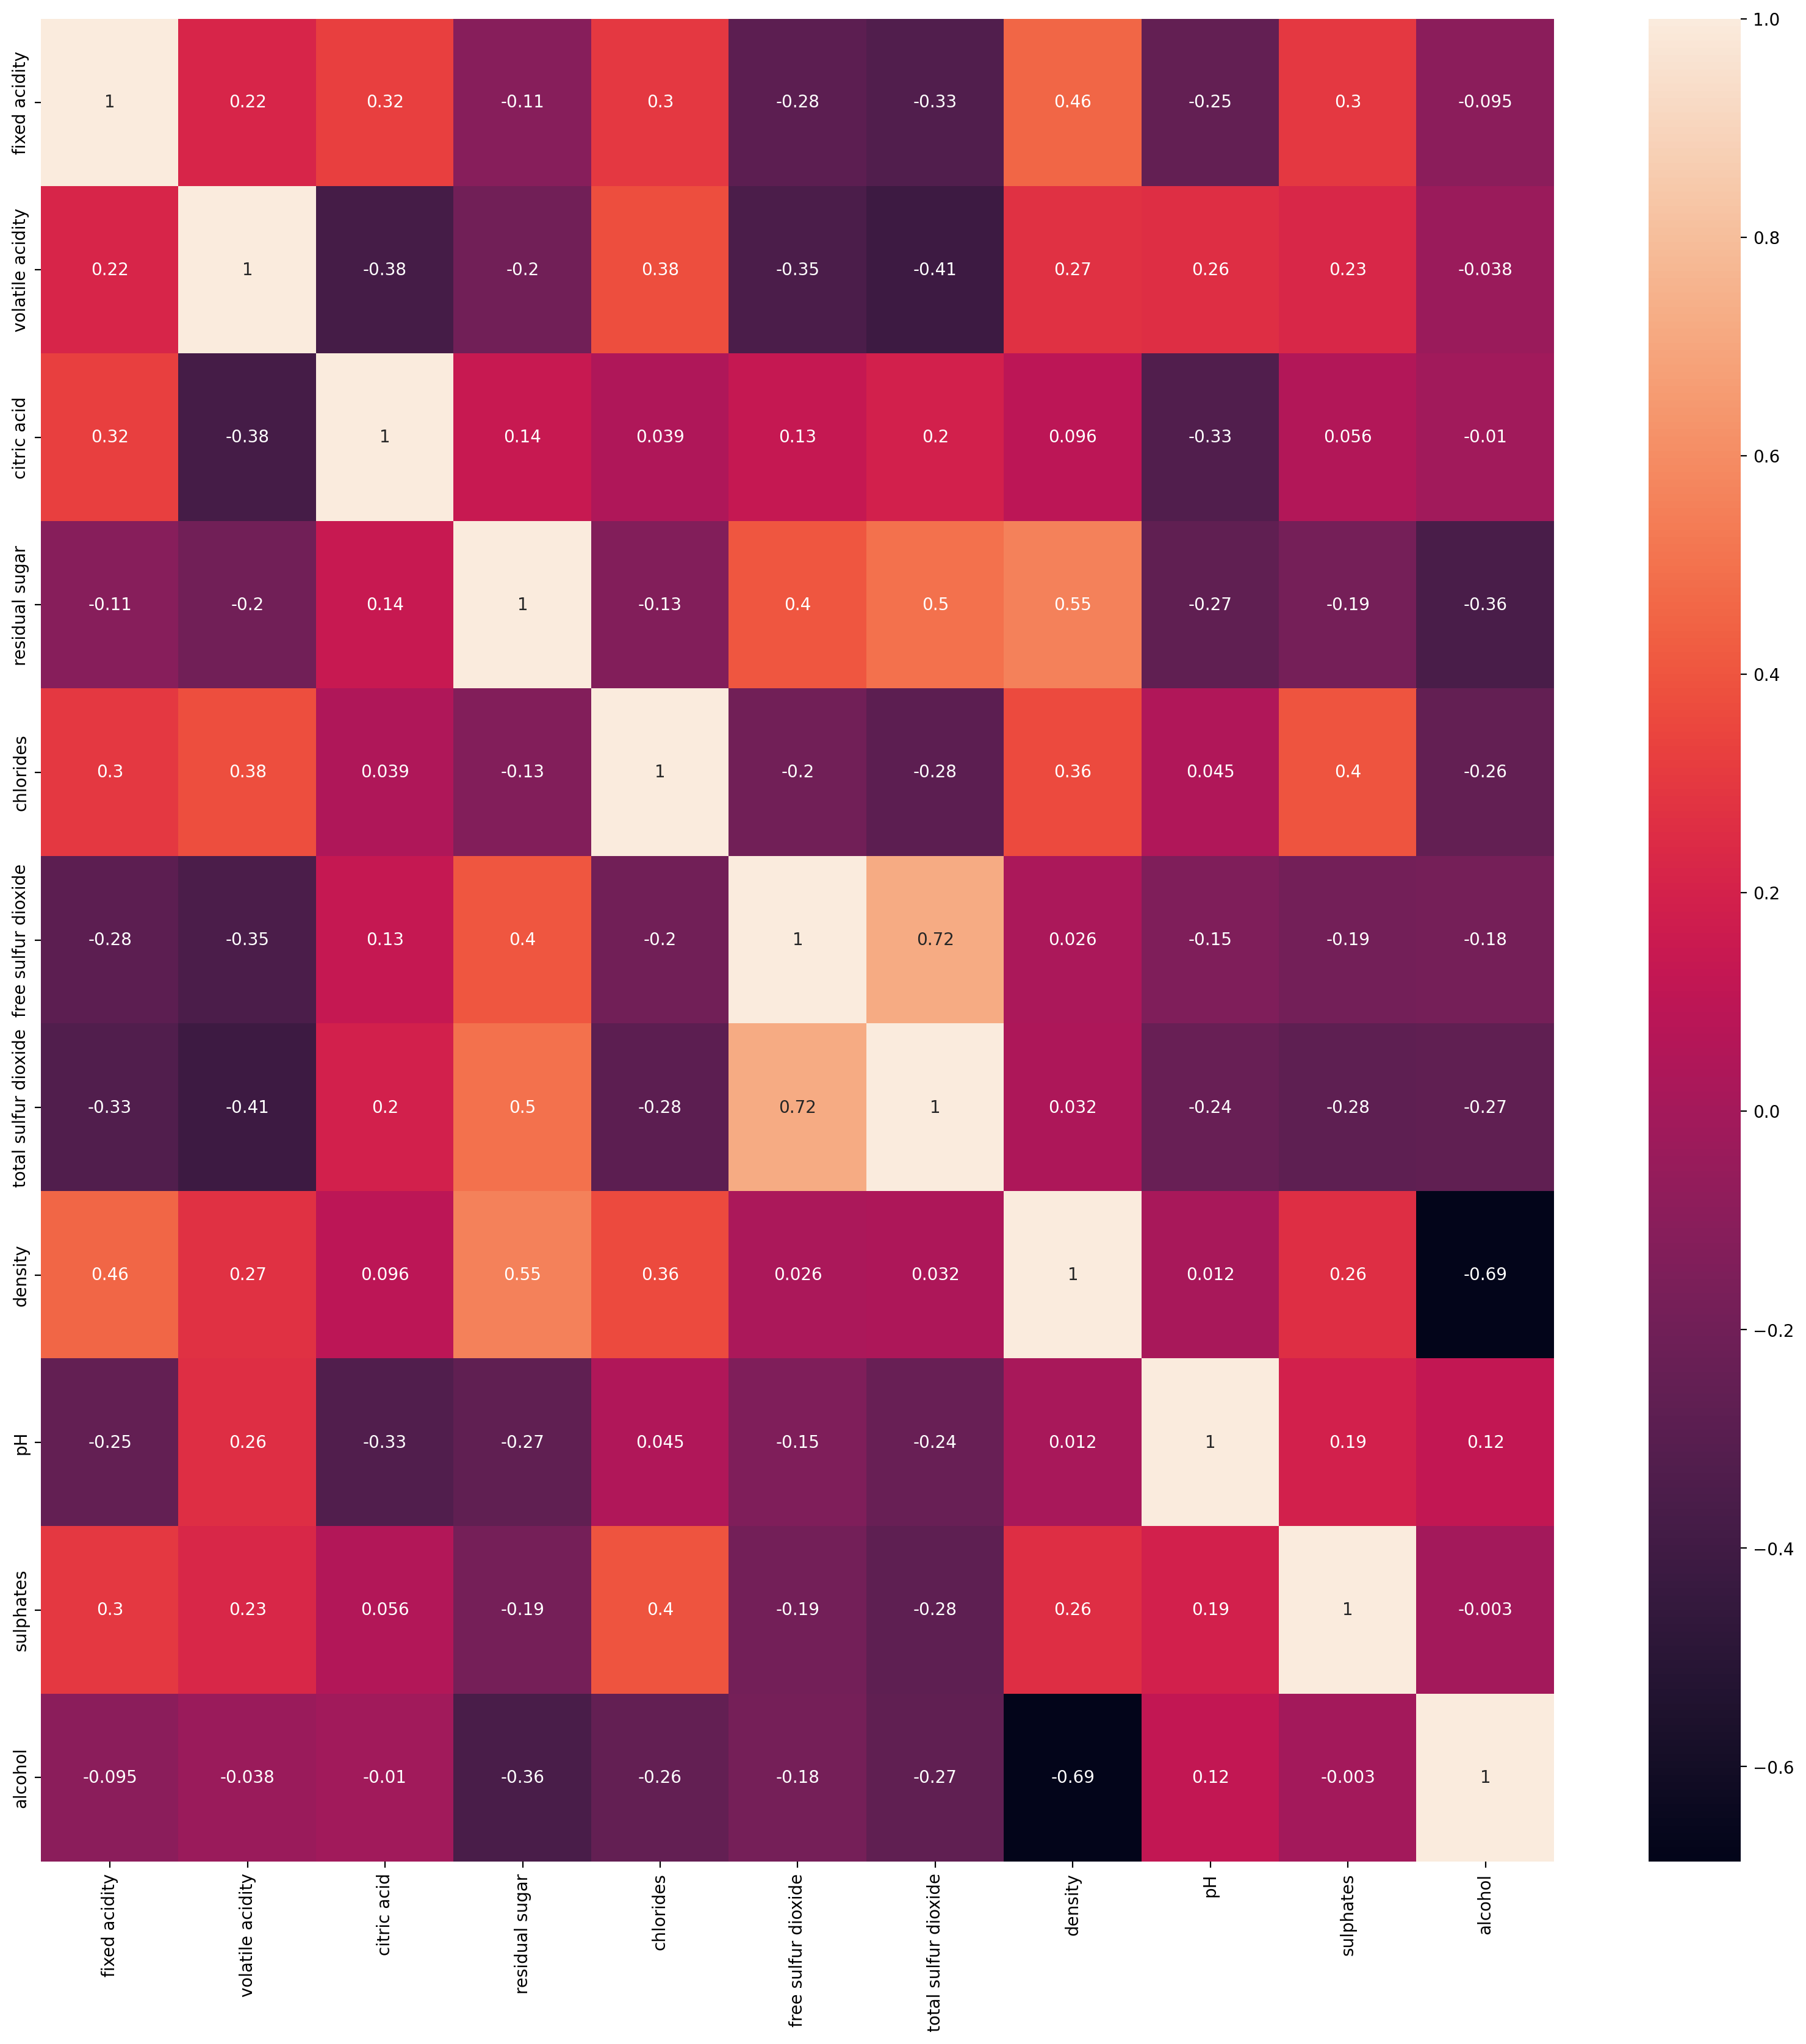

In [6]:
plt.figure(figsize=(20,20), dpi=200)
sns.heatmap(df.corr(), annot=True)

# Using SVMs to detect wine fraud

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


<AxesSubplot:xlabel='quality', ylabel='count'>

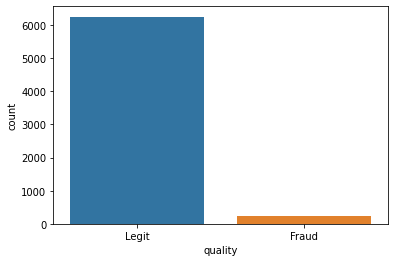

In [11]:
sns.countplot(x=df['quality'])

<AxesSubplot:xlabel='type', ylabel='count'>

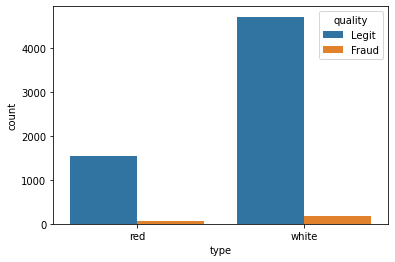

In [12]:
sns.countplot(x=df['type'], hue=df['quality'])

In [81]:
reds = df[df['red'] == 1]
whites = df[df['red'] == 0]

In [87]:
100*len(reds[reds['legit'] == 1])/len(reds)

96.06003752345215

In [13]:
df['legit'] = df['quality'].map({'Legit':1, 'Fraud':0})

<AxesSubplot:>

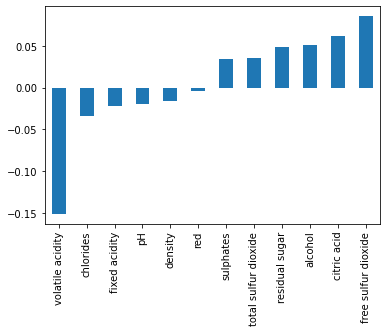

In [89]:
df.corr()['legit'].drop('legit').sort_values().plot(kind='bar')

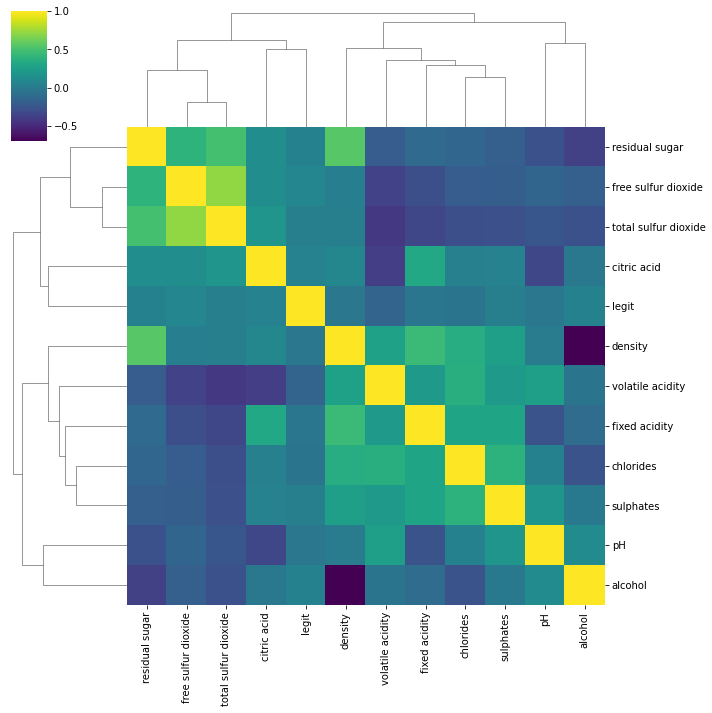

In [25]:
sns.clustermap(data=df.corr(), cmap='viridis')

In [26]:
df['red'] = df['type'].map({'red':1,'white':0})

In [38]:
df = df.drop(['quality','type'], axis=1)

In [39]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,legit,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0


In [40]:
X = df.drop('legit', axis=1)

In [41]:
y = df['legit']

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [57]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [58]:
from sklearn.svm import SVC

In [90]:
svc = SVC(class_weight='balanced')

In [91]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {'C':[0.005,0.05,0.1,1],
              'gamma': ['scale','auto']}

In [96]:
grid = GridSearchCV(svc, param_grid)

In [97]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.005, 0.05, 0.1, 1],
                         'gamma': ['scale', 'auto']})

In [100]:
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, classification_report

In [101]:
grid_preds = grid.predict(scaled_X_test)

In [103]:
confusion_matrix(grid_preds, y_test)

array([[ 17,  92],
       [ 10, 531]])

In [105]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.16      0.63      0.25        27
           1       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

